In [4]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import circuit_drawer

In [5]:
secretnumber = '11100001'

In [6]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

# circuit.h([0, 1, 2, 3, 4, 5])
circuit.h(range(len(secretnumber)))

# circuit.x(6)
# circuit.h(6)
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

# for every '1' that I see in the secret number,I'm going to put a cX gate.
# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
        

circuit.barrier()

# circuit.h([0, 1, 2, 3, 4, 5])
circuit.h(range(len(secretnumber)))

circuit.barrier()

# circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))


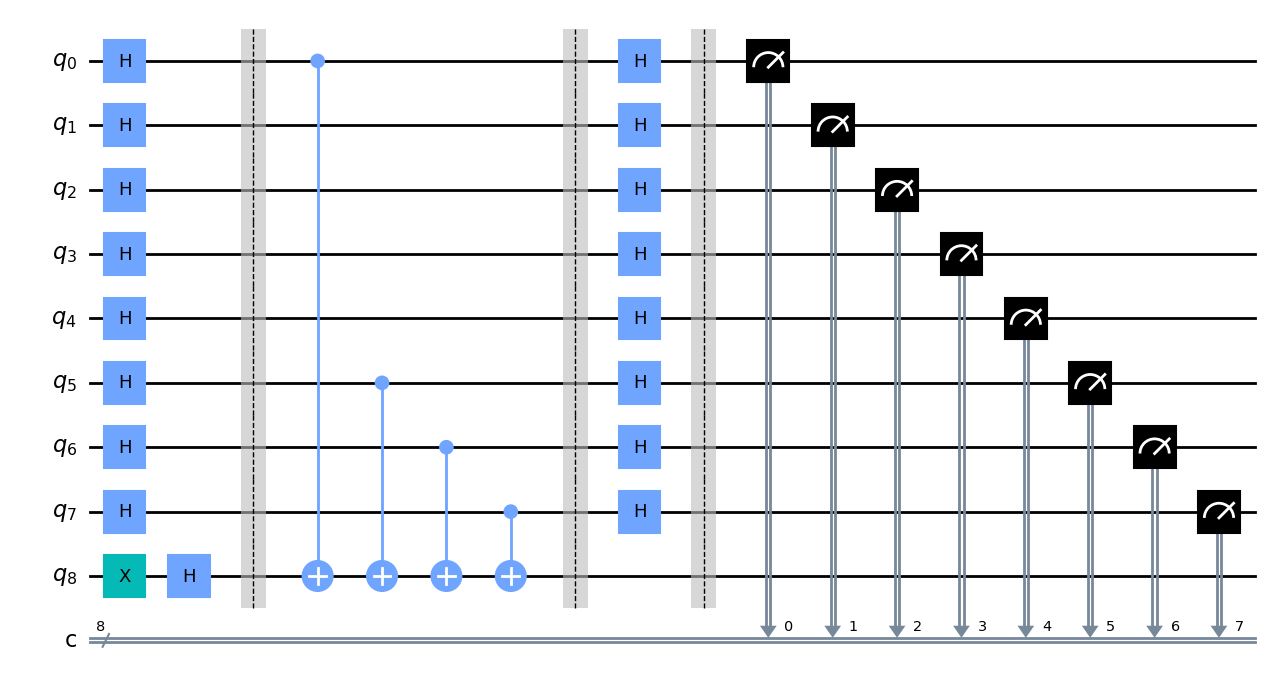

In [7]:
circuit.draw(output='mpl')

In [62]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1). result()
counts = result.get_counts()
print(counts)

{'11100001': 1}
